![image](../QSS/Qulabs.png)

# Lab 4: Deutsch-Jozsa and Grover's Algorithm

In this lab, you will implement Deutsch-Jozsa and Grover's algorithm in `Qiskit`.

### Installing necessary packages

At the begining, you will need to import some packgees into your notebook.

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, transpile, IBMQ, Aer
from qiskit.visualization import plot_histogram
from numpy.random import randint

sim = Aer.get_backend('aer_simulator')

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# Deutsch-Jozsa Algorithm

![image](./DJ.png)

## Creating oracle

***NOTE:*** Oracle depends on function. For different functions we shall have different oracles.

### Constant oracle

For $n$-bit input only two constant functions are possible. Here we are considering $f(x)=1$ for all input $x$.

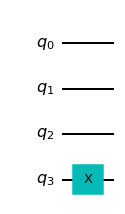

In [2]:
const_oracle = QuantumCircuit(4)

const_oracle.x(3)

const_oracle.draw()

### Balanced oracle

For $n$-bit input, there are $^{2^n}C_{2^{n-1}}$ different balanced functions.

###### Example 1

Consider $n=3$ and the function $f(x_2x_1x_0)=\overline{x_0}$

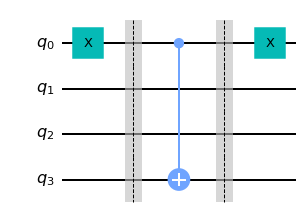

In [3]:
balanced_oracle1 = QuantumCircuit(4)

# Place X-gates
balanced_oracle1.x(0)

# Use barrier as divider
balanced_oracle1.barrier()

# Controlled-NOT gates
balanced_oracle1.cx(0, 3)
# balanced_oracle.cx(n-1, n)

balanced_oracle1.barrier()

# Place X-gates
balanced_oracle1.x(0)

balanced_oracle1.draw()

###### Example 2

Consider $n=3$ and the function $f(x_2x_1x_0)=\overline{x_2}\oplus x_1\oplus\overline{x_0}$

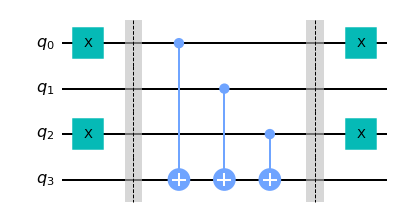

In [4]:
balanced_oracle2 = QuantumCircuit(4)

# Place X-gates
balanced_oracle2.x([0, 2])

# Use barrier as divider
balanced_oracle2.barrier()

# Controlled-NOT gates
for qubit in range(3):
    balanced_oracle2.cx(qubit, 3)

balanced_oracle2.barrier()

# Place X-gates
balanced_oracle2.x([0, 2])

balanced_oracle2.draw()

### Whole Circuit

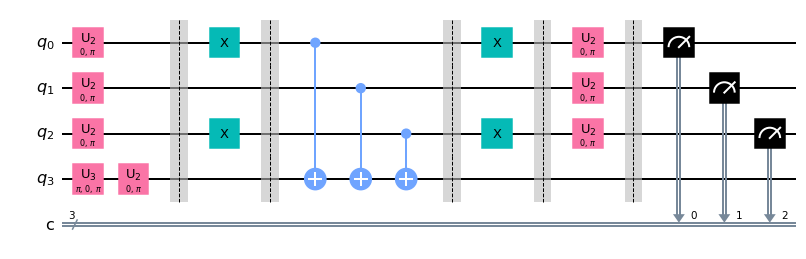

In [5]:
n = 3
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

dj_circuit.barrier()

# Add oracle
dj_circuit.append(balanced_oracle2, range(n+1))

dj_circuit.barrier()

# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Measure
for i in range(n):
    dj_circuit.measure(i, i)

# Display circuit
dj_circuit.decompose().draw()

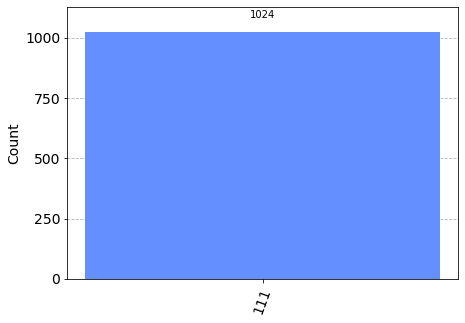

In [6]:
plot_histogram(execute(dj_circuit, sim).result().get_counts())

# Assignment

1. Read the instructions carefully. You are `NOT ALLOWED` to make any change outside the instructed place.
2. Naming format for the submitted file should be Lab4_\<Your_Name\>.ipynb and Assignment_\<Your_Name\>.pdf. If you use any other format that submission `WILL NOT` be considered!!!
3. If supporting calculation (whenever mentioned) is not submitted then `MARKS WILL BE DEDUCTED`.

# Lab - 4 Assignment -1 [5 (1 + (2 + 2)) Points]

Complete the next cell to create
1. constant oracle for `zero function` and
2. balanced oracle as follows:<br>
If input is of the form $4k, 4k+1$ then output is 1 and if input is of the form $4k+2, 4k+3$ then output is 0 for non-negative integer $k$.

Note that value of $n$ is NOT given. Your oracle should work for ANY VALUE of $n$.

Find the function $f(x)$ for above balanced oracle and add the calculation in `Assignment_<Your_Name>.pdf` file.

In [16]:
def dj_oracle(case, n):
    # We need to make a QuantumCircuit object to return
    # This circuit has n+1 qubits: the size of the input,
    # plus one output qubit
    oracle_qc = QuantumCircuit(n + 1)
    
    # First, let's deal with the case in which oracle is balanced
    if case == "balanced":
        
        ### WRITE YOUR CODE BETWEEN THESE LINES - START
        oracle_qc.x(n + 1)
        oracle_qc.barrier()
        for qubit in range(n):
            oracle_qc.cx(qubit, n)

        oracle_qc.barrier()
        oracle_qc.x(n + 1)
        

        ### WRITE YOUR CODE BETWEEN THESE LINES - END
        
    # Case in which oracle is constant
    if case == "constant":
        
        ### WRITE YOUR CODE BETWEEN THESE LINES - START
        oracle_qc.i(n)
        

        ### WRITE YOUR CODE BETWEEN THESE LINES - END
    
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" # To show when we display the circuit
    return oracle_gate

In [17]:
def dj_algorithm(oracle, n):
    dj_circuit = QuantumCircuit(n+1, n)
    # Set up the output register:
    dj_circuit.x(n)
    dj_circuit.h(n)
    
    # Set up the input register:
    for qubit in range(n):
        dj_circuit.h(qubit)
    
    dj_circuit.barrier()
    
    # Append above oracle gate to our circuit:
    dj_circuit.append(dj_oracle(oracle, n), range(4))  ## DO NOT MAKE ANY CHANGE HERE
    
    dj_circuit.barrier()
    # Finally, perform the H-gates and measure:
    for qubit in range(n):
        dj_circuit.h(qubit)
    dj_circuit.barrier()

    # Measure
    for i in range(n):
        dj_circuit.measure(i, i)

  

    return dj_circuit

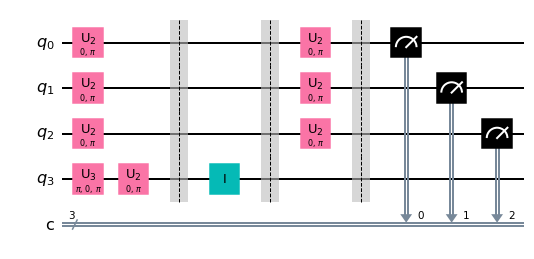

In [18]:
from qiskit import QuantumCircuit, execute, Aer


sim = Aer.get_backend('aer_simulator')

n = 3
dj_circuit = dj_algorithm('constant', n)
dj_circuit.decompose().draw('mpl')

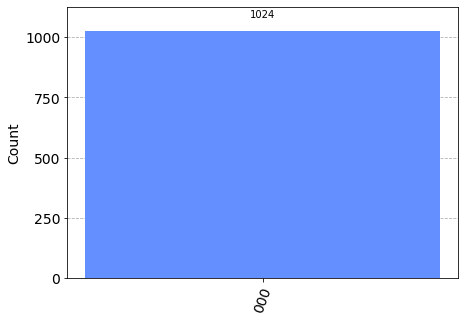

In [19]:
from qiskit.visualization import plot_histogram

plot_histogram(execute(dj_circuit, sim).result().get_counts())

# Grover's Algorithm

![image](./Grover.png)

##### Step 1

![image](./G1.png)

##### Step 2

![image](./G2.png)

##### Step 3

![image](./G3.png)

Putting these components together, and applying the Oracle and Diffusion operators $O(\sqrt{N = 2^n})$ times, Grover's algorithm allows us to successfully determine the elements that were marked by the Oracle operator with high probability. This is shown in the block diagram above

##### Let's start implementation
We start with to search element $\vert10\rangle$ in $\{\vert00\rangle, \vert01\rangle, \vert10\rangle, \vert11\rangle\}$.

**Recall that the action of the phase oracle is to add a phase of $-1$ to all states representing the marked elements, while leaving all other states unchanged.**

The operator to perform this is $$U_\omega = \begin{bmatrix}1&0&0&0\\0&1&0&0\\0&0&-1&0\\0&0&0&1\end{bmatrix}$$

In [1]:
from qiskit.quantum_info import Operator
from qiskit import QuantumCircuit
import numpy as np

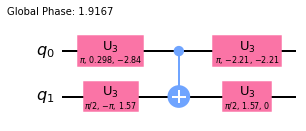

In [2]:
oracle = QuantumCircuit(2)
U = np.identity(4)
U[2][2] = -1
U = Operator(U)
oracle.unitary(U, range(2))
oracle.decompose().draw()

# Lab - 4: Assignment - 2 [10 (3 + (3 + 2 + 2)) Points]

Given two sets $A$ and $B$. We are trying to find $A\cap B$.

In [2]:
def phase_oracle(qubit, elements_to_mark, name = 'Oracle'):
    '''qubit is number of qubits in the circuit
    elements_to_mark is a list of elements for which sign of amplitude will be changed'''
    
    # create a quantum circuit
    qc = QuantumCircuit(qubit, name = name)

    ### WRITE YOUR CODE BETWEEN THESE LINES - START
    elements_to_mark = []
    oracle_matrix = np.identity(2**qubit)
    oracle_matrix[qubit][qubit] = -1
     
    ### WRITE YOUR CODE BETWEEN THESE LINES - END

    # convert your matrix (called oracle_matrix) into an operator, and add it to the quantum circuit
    qc.unitary(Operator(oracle_matrix), range(qubit))
    
    return qc

We can create diffuser using phase oracle itself. Note that both are reflections. To perform diffuser we first change $\vert\omega_0\rangle$ to $\vert0\rangle$ and then apply `phase_oracle` with all the states orthogonal to $\vert0\rangle$ as `elements_to_mark`, which is equivalent (upto global phase $-1$) to applying `phase_oracle` with $\vert0\rangle$ as `elements_to_mark`.

In [3]:
def diffuser(qubit, search_list):
    
    # create a quantum circuit
    qc = QuantumCircuit(qubit, name='Diffuser')
    
    sv = [0] * (2**qubit)
    for i in search_list:
        sv[int(i, 2)] = 1/sqrt(len(search_list))
    init = Initialize(sv)
    inv = init.gates_to_uncompute()
    
    # changing to |0⟩
    qc.append(inv, range(qubit))
    
    # Applying phase oracle
    qc.append(phase_oracle(qubit, ['0'], name = 'Diffuser'), range(qubit))
    
    # return back to the previous state
    qc.append(inv.inverse(), range(qubit))
    
    return qc

#### Putting it all together

Finally, we combine the functions to construct Grover's algorithm. We need to determine the optimal number of rounds $k$ (add the calculation in `Assignment_<Your_Name>.pdf`).

Let's construct a quantum program that finds $A\cap B$. To do this, we will need to do the following: 
1. Initialize the qubits.
2. Next, we apply $k$ rounds of Grover's algorithm, where each round consists of the application of the phase oracle with the marked elements and the diffuser.
3. Finally, we need to measure all qubits.

The next lines of code put everything together.

Determine value of $k$ and complete step 2 [DO NOT TOUCH ANYTHING ELSE]:

In [4]:
def Grover(search_list, marked_elements):
    
    # Create a quantum circuit on n qubits
    n = len(search_list[0])
    qc = QuantumCircuit(n, n)
    
    # Determine k
    k = int(np.pi*(np.sqrt(2**n))/4)
    
    
    print(f'{n} qubits, basis states {marked_elements} marked, {k} rounds')
    
    # step 1: Initialize the qubits
    sv = [0] * (2**n)
    for i in search_list:
        sv[int(i, 2)] = 1/sqrt(len(search_list))
    init = Initialize(sv)
    qc.append(init, range(n))
    
    # step 2: apply k rounds of the phase oracle and the diffuser
    for i in range(0,k+1):
        qc.append(phase_oracle(n, marked_elements, name = 'Oracle'), range(n)) 
        qc.append(diffuser(n, search_list), range(n)) 
    
    # step 3: measure all qubits
    qc.measure(range(n),range(n))
    return qc

from qiskit import QuantumCircuit
from math import log, sqrt
import numpy as np
from qiskit.quantum_info import Operator
from qiskit.extensions import Initialize

mycircuit = Grover(['00000', '00001', '01001'], ['00001', '01001', '10100'])
mycircuit.decompose().decompose().draw('mpl')

5 qubits, basis states ['00001', '01001', '10100'] marked, 4 rounds


Let's see the outcome.

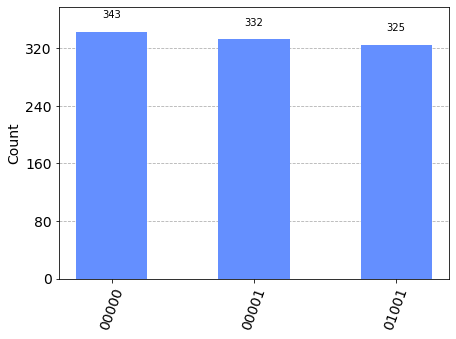

In [5]:
from qiskit import Aer, execute
simulator = Aer.get_backend('qasm_simulator')
counts = execute(mycircuit, backend=simulator, shots=1000).result().get_counts(mycircuit)
from qiskit.visualization import plot_histogram
plot_histogram(counts)

# Theory Assignment [15 (5 * 3) Points]

#### Assignment_\<Your_Name\>.pdf will contain answers of the following questions:

1. Note that according to Grover's algorithm, at $t^{th}$ iteration in `diffuser`, reflection is performed about initial state $\vert\omega_o\rangle$. What will be the effect (in terms of time and error) if that will be performed about $\vert\omega_t\rangle$? [$2\frac{1}{2} + 2\frac{1}{2}$]
2. Discuss above question considering the number of elements in the given set is $8$. [5]
3. Suppose we are searching for $\vert\omega\rangle$ in the set $S$. What outcome do you expect from Grover's algorithm if $\vert\omega\rangle\notin S$? What will be the state $\vert\omega_t\rangle$? [3 + 2]